<a href="https://colab.research.google.com/github/Horace-code/British-Airways-Sentiment-Analysis/blob/main/British_Airways_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Web scraping**

Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

In [162]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [163]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [164]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Filthy plane, cabin staff o..."
1,✅ Trip Verified | Chaos at Terminal 5 with B...
2,Not Verified | BA cancelled our flight and co...
3,✅ Trip Verified | When on our way to Heathrow ...
4,"✅ Trip Verified | Nice flight, good crew, very..."


In [165]:
df.to_csv("data/BA_reviews.csv")

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


# **2. VADER Sentiment Scoring**
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:


*   Stop words are removed
*   each word is scored and combined to a total score.



In [167]:
# import libraries
import pandas as pd
import seaborn as sns
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

In [168]:
# download nltk corpus (first time only)
import nltk

In [169]:

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


In [170]:
#Load in data
df1= pd.read_csv("data/Sentiment_BA_reviews.csv")
df1

,Id,reviews
0,0,"✅ Trip Verified | Filthy plane, cabin staff o..."
1,1,✅ Trip Verified | Chaos at Terminal 5 with B...
2,2,Not Verified | BA cancelled our flight and co...
3,3,✅ Trip Verified | When on our way to Heathrow ...
4,4,"✅ Trip Verified | Nice flight, good crew, very..."
...,...,...
1995,1995,We recently flew British Airways business clas...
1996,1996,✅ Verified Review | London Heathrow to Geneva...
1997,1997,London City to Malaga return. Things started b...
1998,1998,✅ Verified Review | \r\nCome on British Airwa...


In [172]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    text = row['reviews']
    myid= row['Id']
    sentiment_scores = sia.polarity_scores(text)
    res[myid] = sentiment_scores

  0%|          | 0/2000 [00:00<?, ?it/s]

In [173]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df1, how='left')

In [174]:
# Now we have sentiment score and metadata
vaders

,Id,neg,neu,pos,compound,reviews
0,0,0.151,0.760,0.089,-0.5574,"✅ Trip Verified | Filthy plane, cabin staff o..."
1,1,0.140,0.848,0.012,-0.9313,✅ Trip Verified | Chaos at Terminal 5 with B...
2,2,0.092,0.873,0.035,-0.7143,Not Verified | BA cancelled our flight and co...
3,3,0.073,0.914,0.014,-0.8910,✅ Trip Verified | When on our way to Heathrow ...
4,4,0.018,0.886,0.096,0.9228,"✅ Trip Verified | Nice flight, good crew, very..."
...,...,...,...,...,...,...
1995,1995,0.074,0.892,0.033,-0.7669,We recently flew British Airways business clas...
1996,1996,0.151,0.746,0.102,-0.8428,✅ Verified Review | London Heathrow to Geneva...
1997,1997,0.100,0.857,0.043,-0.7796,London City to Malaga return. Things started b...
1998,1998,0.061,0.783,0.156,0.9833,✅ Verified Review | \r\nCome on British Airwa...


In [175]:
#Creating a fresh column named 'Emotion_Type' that utilizes nltk to capture the sentiment category
#for each review, based on the corresponding sentiment scores in the 'compound' column

vaders['Emotion_Type '] = vaders['compound'].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')
    )
vaders

,Id,neg,neu,pos,compound,reviews,Emotion_Type
0,0,0.151,0.760,0.089,-0.5574,"✅ Trip Verified | Filthy plane, cabin staff o...",Negative
1,1,0.140,0.848,0.012,-0.9313,✅ Trip Verified | Chaos at Terminal 5 with B...,Negative
2,2,0.092,0.873,0.035,-0.7143,Not Verified | BA cancelled our flight and co...,Negative
3,3,0.073,0.914,0.014,-0.8910,✅ Trip Verified | When on our way to Heathrow ...,Negative
4,4,0.018,0.886,0.096,0.9228,"✅ Trip Verified | Nice flight, good crew, very...",Positive
...,...,...,...,...,...,...,...
1995,1995,0.074,0.892,0.033,-0.7669,We recently flew British Airways business clas...,Negative
1996,1996,0.151,0.746,0.102,-0.8428,✅ Verified Review | London Heathrow to Geneva...,Negative
1997,1997,0.100,0.857,0.043,-0.7796,London City to Malaga return. Things started b...,Negative
1998,1998,0.061,0.783,0.156,0.9833,✅ Verified Review | \r\nCome on British Airwa...,Positive


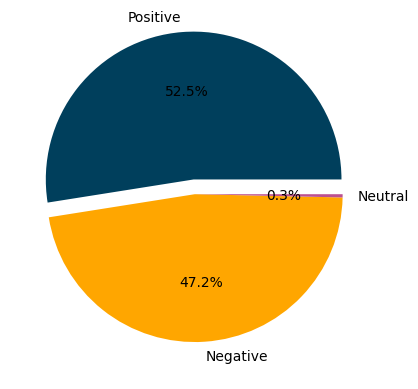

In [176]:
# Compute the distribution percentages for each emotional category
emotion_type_proportions = vaders['Emotion_Type '].value_counts(normalize=True) * 100

# Generate a pie chart to visualize the distribution
fig, ax = plt.subplots()
ax.pie(
    emotion_type_proportions,
    labels= emotion_type_proportions.index,
    colors=['#003f5c', '#ffa600', '#bc5090'],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%'
    )

plt.show()


# Sentiment Distribution.
Among a total of 2000 reviews, approximately 52.5% (1050 Reviews) exhibited a positive sentiment, around 47.2% (944 Reviews) were characterized as negative, and merely 0.3% (6 Reviews) were identified as neutral. Consequently, the prevailing trend in these reviews is one of polarization, with the majority leaning towards either a positive or negative sentiment.

## **3. Text Analysis and Visualization**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


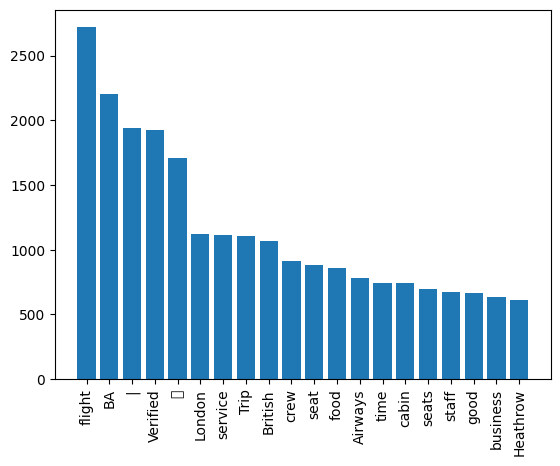

In [177]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download('stopwords')

# Sample reviews data (replace this with your actual data)
reviews = vaders["reviews"]

# Combine all reviews into a single string
all_reviews_text = ' '.join(reviews)

# Tokenize the text (split into words)
words = all_reviews_text.split()

# Filter out stopwords
stopwords = nltk.corpus.stopwords.words('english')
filtered_words = [word for word in words if word.lower() not in stopwords and word.lower() not in ['i', 'the', 'would', 'one', 'get', '-']]

# Create a Counter to count word frequencies
word_freq = Counter(filtered_words)

# Get the most common words and their frequencies
common_words = word_freq.most_common(20)

# Get the labels and values for the histogram
labels, values = zip(*common_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

# Display the plot
plt.show()


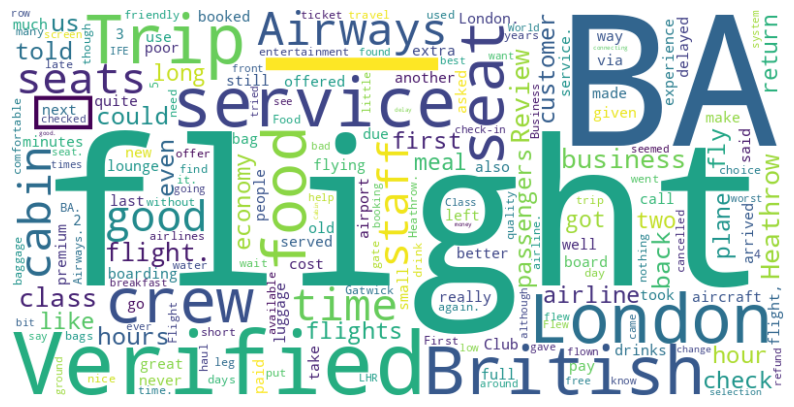

In [178]:

#To create a word cloud visualization of the most common words in the reviews
from wordcloud import WordCloud

# Create a WordCloud object based on the word frequencies obtained
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Observations in the Key Topics
Upon analyzing the reviews, certain recurring themes emerge as significant key topics. These topics encompass terms such as "flight," "London," "service," "food," "staff," "seat," and "crew." The presence of these key topics underscores the importance of these aspects in travelers' experiences and sheds light on the areas that are particularly influential in shaping their perceptions of the travel journey.